# RIT IMGS 211: Probability and Statistics for Imaging Scientists
### Created by Gabriel J. Diaz

![](https://www.rit.edu/brandportal/sites/rit.edu.brandportal/files/inline-images/new_RIT_full_RGB_hor_k_0.png?export=view&id=XXX)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1- The frozen Binomial distribution

The binomial probability distribution can be used to calculate the probability of a certain number of ‘successes’ in n trials.

For example, if 100 photons arrive at a sensor with a quantum efficiency (QE) of 0.75, what is the likelihood that 75 will be detected? We can answer this question using the binomial probability mass function:

$P(x) =  \frac{n!}{x!(n-x)!} p^xq^{n-x}$

where:

$P(75)$ = probability of exactly $x$ successes - what we are solving for<br/>
$n$ = 100 (number of trials)<br/>
$p$ = 0.75 (probability of success) <br/>
$q$ = 0.25 (probability of failure, or 1-p)$

so, $P(75) =  \frac{100!}{75!(25)!} 0.75^{75}0.25^{100-25}$

### Create the "frozen distribution"

Below, I create a "frozen" distribution - in this case, a binomial probability mass function.

Read more about it here:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [4]:
import scipy.stats as stats

p = 0.75 # probability of a "success" - in this case that a photon is detected
n = 100 # number of chances at success - in this case, number of photons that hit the sensor

# Create a fozen binomial distribution with paramters q and p
qe_frozen_binomial_dist = stats.binom(n,p)

print(f'Our frozen distribution is of type: {type(qe_frozen_binomial_dist)}')

Our frozen distribution is of type: <class 'scipy.stats._distn_infrastructure.rv_discrete_frozen'>


Given $n=100$ and $p=0.75$, calculate the probability that 75 photons will be detected.

In [5]:

# Frozen distirbution qe_frozen_binomial_dist was created
# using the parameters n=100 and p=0.75.
# Now, we can use it to evaluate for different values of x.

# The method is "<rv_discrete_frozen>.pmf(x)"
a_probability = qe_frozen_binomial_dist.pmf(75)
print(f'The probability of detecting 75 photons given n=100 and p=0.75 is {a_probability:.3f}.')

The probability of detecting 75 photons given n=100 and p=0.75 is 0.092.


We can do this for a range of values, too.

In [6]:
num_photons = np.arange(65,75)
y_probabilities = qe_frozen_binomial_dist.pmf(num_photons)

print('The type of y_probabilities is: {type(y_probabilities)}')
print('The values of y_probabilities are:')

for idx, a_prob in enumerate(y_probabilities):
  print(f'p({num_photons[idx]})={a_prob:.3f}')


The type of y_probabilities is: {type(y_probabilities)}
The values of y_probabilities are:
p(65)=0.007
p(66)=0.011
p(67)=0.017
p(68)=0.025
p(69)=0.034
p(70)=0.046
p(71)=0.058
p(72)=0.070
p(73)=0.081
p(74)=0.088


## Plot p(x) across a range to visualize the probability mass function.

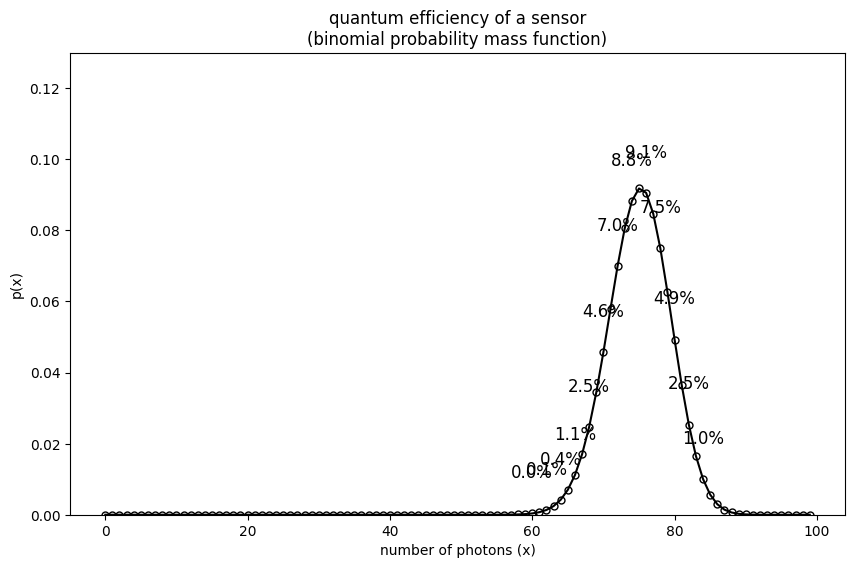

In [7]:
num_photons = np.arange(0,100)
y_probabilities = qe_frozen_binomial_dist.pmf(num_photons)

plt.figure(figsize=(10,6))
plt.plot(num_photons, y_probabilities, '-ko', markerfacecolor='none',
         ms=5, label='binom pmf')

# Add text labels
for i in np.arange(60,85,2):
  plt.text(num_photons[i], y_probabilities[i]+.01,
           f'{100.0*y_probabilities[i]:.1f}%',size=12,ha='center')

plt.title('quantum efficiency of a sensor\n(binomial probability mass function)')
plt.xlabel('number of photons (x)')
plt.ylabel('p(x)')
plt.ylim((0, .13))
plt.show()




---


#2. The Poisson probability distribution.
<!--
The Poisson probability distribution can be used to calculate the probability of a certain number of ‘successes’ in an interval given a known average.

For example, if 100 photons of a specific wavelength fall on a medium wavelength cone, between 10-15 will be absorbed, but we need a specific number, so let's assume *13* photons will be absorbed.

What is the probability that 10 are absorbed?  What about just one? -->


### Given the parameters of a Poisson distribution, calculate a probability.

The function below, `poisson.pmf(k, lam)` accepts an integer k (e.g. a potential observation, the lambda paramter that described the poisson distribution, and returns a probability.


According to calculations from "The First Steps in Seeing" by R.W. Rodieck of 9,400 photons that entered your eye within the ~100 ms window of cone integration, only 10-15 photons will be transduced by a cone in the center of your fovea.  

## Calculate a probability associated with a single value of k (potential outcomes)

Let's use this data to estimate the likelihood of a single cone activating a photoreceptor.  To begin with, we will assume 15 are absorbed (a more optimistic estimate).

In [25]:
# Over 100ms,
# Cones received 170 photons from Polaris.

k = 1 #np.arange(0, 50, 1)
lam = 15  # on average, 15 are absorbed over the interval

prob = stats.poisson.pmf(k, lam)

print(f'We know that 9,400 photons of a particular wavelength fall on a cone, {lam} are absorbed on average.')
print(f'According to a Poison distribution, this means there is a probability of {prob:.6f} that {k} will be absorbed.')
print(f'...or a {100 * prob:.4f}% chance.')

We know that 9,400 photons of a particular wavelength fall on a cone, 15 are absorbed on average.
According to a Poison distribution, this means there is a probability of 0.000005 that 1 will be absorbed.
...or a 0.0005% chance.


### Calculate probability associated with many values of k (potential outcomes)

In [13]:

list_of_k = np.arange(0, 10, 1) # How many are aborbed? Simulate k from 10 to 20 in intervals of 1
lam = 15

list_of_probs = stats.poisson.pmf(list_of_k, lam);

for i, prob in enumerate(list_of_probs):
  print(f'Probability of {list_of_k[i]} occurances: {prob:.6f}')


Probability of 0 occurances: 0.000000
Probability of 1 occurances: 0.000005
Probability of 2 occurances: 0.000034
Probability of 3 occurances: 0.000172
Probability of 4 occurances: 0.000645
Probability of 5 occurances: 0.001936
Probability of 6 occurances: 0.004839
Probability of 7 occurances: 0.010370
Probability of 8 occurances: 0.019444
Probability of 9 occurances: 0.032407


### Plot our high and low estimates

Let's plot our Poisson distributions assuming that ...
* 15 photons are aborbed (upper bound) or
* 10 photons are aborbed (lower bound)

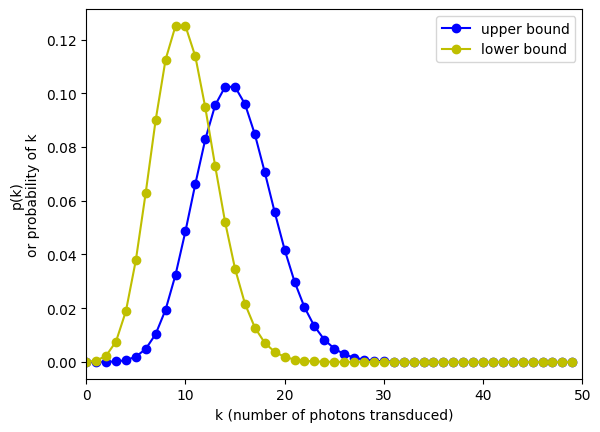

In [23]:
# Plot!

list_of_k = np.arange(0, 50, 1) # How many are aborbed? Simulate k from 10 to 20 in intervals of 1
low_lam = 10
high_lam = 15

list_of_probs_high = stats.poisson.pmf(list_of_k, high_lam)
list_of_probs_low = stats.poisson.pmf(list_of_k, low_lam)

h1 = plt.plot(list_of_k, list_of_probs_high, '-ob') # the blue line
h2 = plt.plot(list_of_k, list_of_probs_low, '-oy') # the yellow line
# plt.vlines(list_of_k, 0, list_of_probs, colors='b', lw=2) # the blue vertical lines

plt.legend(['upper bound', 'lower bound'])
plt.xlabel('k (number of photons transduced)')
plt.ylabel('p(k)\nor probability of k')
plt.xlim([0,50])
plt.show()

### The area between these two distributions defines the range of probabilities that a number of photons will be transduced at the center of our fovea when viewing Polaris at night.